In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score

from sklearn import metrics 
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import SelectFromModel

from xgboost import XGBClassifier

from xgboost import plot_importance, plot_tree

import matplotlib.pyplot as plt
plt.rc("font", size=14)

import seaborn as sns
sns.set()
sns.set(style="white")
#sns.set(style="whitegrid")

url = 'https://raw.githubusercontent.com/IBM/xgboost-financial-predictions/master/data/bank.csv'
data_raw_all = pd.read_csv(url, header=0, sep=";")
data_raw_all.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [3]:
display(data_raw_all.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
def clean_data(df):
    data = df.dropna()
    data['day'] = df['day'].astype('object')
    return data

data_ex = clean_data(data_raw_all).sample(frac=1.0)
print(data_ex.shape)
data_ex.dtypes

(4521, 17)


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day          object
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

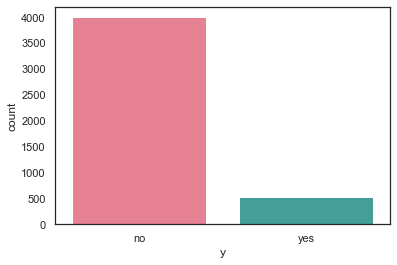

In [10]:
sns.countplot(x='y', data=data_ex, palette='husl')
plt.show()

In [11]:
data_ex.groupby('y').mean()

,age,balance,duration,campaign,pdays,previous
y,,,,,,
no,40.998000,1403.211750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,552.742802,2.266795,68.639155,1.090211


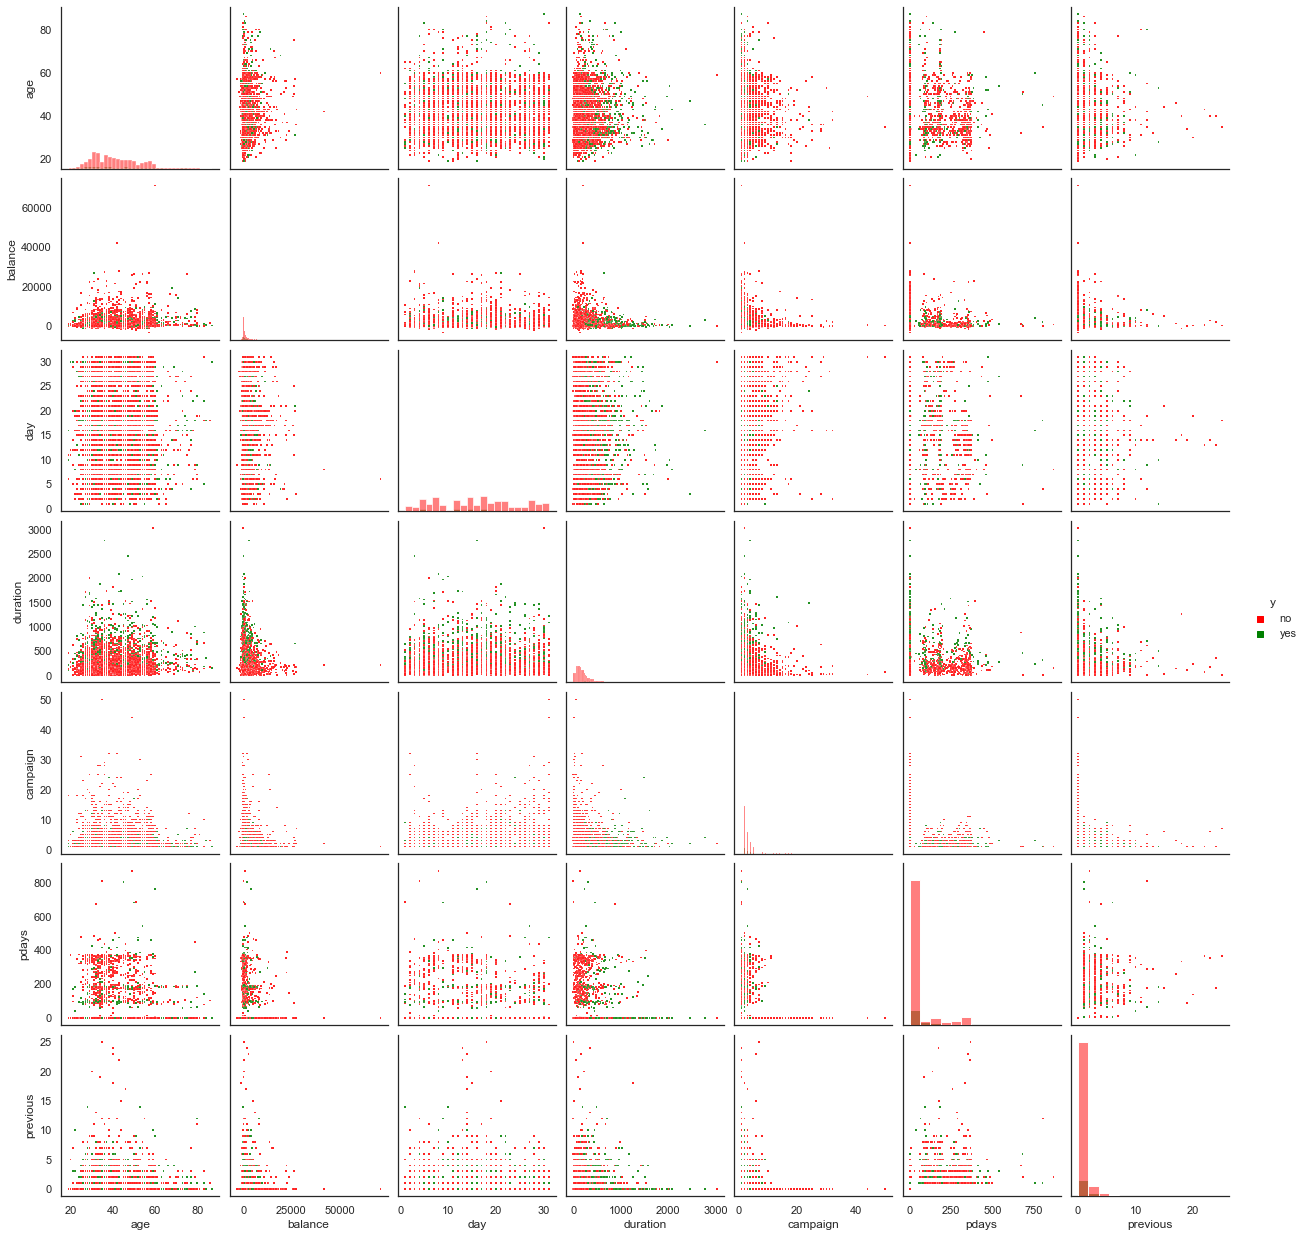

In [12]:
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

num_cols_with_y = num_cols + ['y']

g = sns.pairplot(data_ex[num_cols_with_y], 
                 hue = 'y', 
                 diag_kind='hist',  # histogram plot for diag
                 dropna=True,
                 markers=[',', ','], # markers for yes and no                 
                 palette=sns.color_palette(['red', 'green']), # # yes is green and no is red
                 plot_kws={'s':3},)

# g = g.map_lower(sns.kdeplot, cmap="Blues_d")

plt.show()